In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
houses_train = pd.read_csv('houses_train.csv')
houses_test = pd.read_csv('houses_test.csv')

First of all i googled which are important factors to determine how much a house worth , that's what i found:

- if the property has free space to build new rooms , so maybe we'll calculate the lot free area.
- number of bathrooms : houses with more bathroooms are more valuable , even more if they have many bedrooms, maybe we can calculate the difference between the number of bathrooms and the number of bedrooms
- if the property has a garage or parking spot
- age and condition , in the dataset we have many features about quality and condition , we also have the date of the last remodel

# EDA on the train data

In [3]:
houses_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
houses_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
houses_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
columns_with_null_values = houses_train.columns[houses_train.isna().any()].tolist()

#getting the name and total number of null values per column
columns_with_null_values_sum = {}
for column_name in columns_with_null_values:
    columns_with_null_values_sum[column_name] = houses_train[column_name].isnull().sum()
    
columns_with_null_values_sum

{'LotFrontage': 259,
 'Alley': 1369,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

# Handling missing data

## Alley column

In [7]:
#there are so many null values for Alley , we'll drop the entire column
houses_train.drop(['Alley'],axis=1,inplace=True)

In [8]:
columns_with_null_values = houses_train.columns[houses_train.isna().any()].tolist()

#getting the name and total number of null values per column
columns_with_null_values_sum = {}
for column_name in columns_with_null_values:
    columns_with_null_values_sum[column_name] = houses_train[column_name].isnull().sum()
    
columns_with_null_values_sum

{'LotFrontage': 259,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

## MasVnrType column

In [9]:
houses_train['MasVnrType'].isna().sum()

8

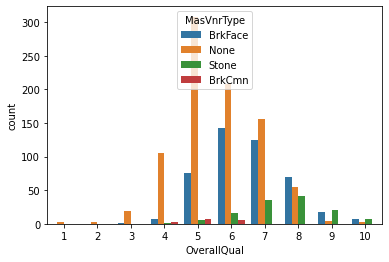

In [10]:
sns.countplot(houses_train['OverallQual'] , hue= houses_train['MasVnrType'])
#BrkFace and stone is used in better quality houses

In [11]:
def input_MasVnrType(cols):
    
    MasVnrType = cols[0]
    OverallQual = cols[1]
    if pd.isnull(MasVnrType):
        if OverallQual < 8:
            return 'None'
        elif OverallQual > 8:
            return 'Stone'
        else:
            return 'BrkFace'
    else:
        return MasVnrType

In [12]:
houses_train['MasVnrType'] = houses_train[['MasVnrType','OverallQual']].apply(input_MasVnrType,axis = 1)

In [13]:
houses_train['MasVnrType'].isna().sum()

0

##  MasVnrArea column

In [14]:
houses_train['MasVnrArea'].isna().sum()

8

In [15]:
houses_train[houses_train['MasVnrArea'].isna()][['MasVnrArea','MasVnrType','OverallQual']]

,MasVnrArea,MasVnrType,OverallQual
234,NaN,None,6
529,NaN,None,6
650,NaN,None,7
936,NaN,None,7
973,NaN,None,7
977,NaN,None,7
1243,NaN,Stone,10
1278,NaN,BrkFace,8


In [16]:
#not every house has a MasVnr , so we'll calculate the mean only of those that has one.
MasVnrArea_mean = houses_train[houses_train['MasVnrType'] != 'None']['MasVnrArea'].mean()

In [17]:
def input_MasVnrArea(cols):
    
    if pd.isnull(cols[1]):
        #if there isn't a masVnr the area is 0
        if cols[0] == 'None' :
            return 0.0
        #if there is a masVnr the area is the mean previously calculated
        else:
            return MasVnrArea_mean
    else:
        return cols[1]

In [18]:
houses_train['MasVnrArea'] = houses_train[['MasVnrType','MasVnrArea']].apply(input_MasVnrArea,axis = 1)

In [19]:
houses_train['MasVnrArea'].isna().sum()

0

## BsmtQual column

In [20]:
houses_train['BsmtQual'].isna().sum()

37

In [21]:
houses_train[houses_train['BsmtQual'].isna()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF
17,NaN,NaN,NaN,NaN,NaN,0
39,NaN,NaN,NaN,NaN,NaN,0
90,NaN,NaN,NaN,NaN,NaN,0
102,NaN,NaN,NaN,NaN,NaN,0
156,NaN,NaN,NaN,NaN,NaN,0
182,NaN,NaN,NaN,NaN,NaN,0
259,NaN,NaN,NaN,NaN,NaN,0
342,NaN,NaN,NaN,NaN,NaN,0
362,NaN,NaN,NaN,NaN,NaN,0
371,NaN,NaN,NaN,NaN,NaN,0


In [22]:
#the houses with null BsmtQual values does not have a basement , as seen on the cell above
houses_train['BsmtQual'].fillna(value = 'NA',inplace = True)

In [23]:
houses_train['BsmtQual'].isna().sum()

0

## BsmtCond column

In [24]:
houses_train['BsmtCond'].isna().sum()

37

In [25]:
houses_train[houses_train['BsmtCond'].isna()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,NA,NaN,NaN,NaN,NaN
39,NA,NaN,NaN,NaN,NaN
90,NA,NaN,NaN,NaN,NaN
102,NA,NaN,NaN,NaN,NaN
156,NA,NaN,NaN,NaN,NaN
182,NA,NaN,NaN,NaN,NaN
259,NA,NaN,NaN,NaN,NaN
342,NA,NaN,NaN,NaN,NaN
362,NA,NaN,NaN,NaN,NaN
371,NA,NaN,NaN,NaN,NaN


In [26]:
#the houses with null BsmtQual values does not have a basement , as seen on the cell above
houses_train['BsmtCond'].fillna(value = 'NA',inplace = True)

In [27]:
houses_train['BsmtCond'].isna().sum()

0

## BsmtCond column

In [28]:
houses_train['BsmtExposure'].isna().sum()

38

In [29]:
houses_train[houses_train['BsmtExposure'].isna()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,NA,NA,NaN,NaN,NaN
39,NA,NA,NaN,NaN,NaN
90,NA,NA,NaN,NaN,NaN
102,NA,NA,NaN,NaN,NaN
156,NA,NA,NaN,NaN,NaN
182,NA,NA,NaN,NaN,NaN
259,NA,NA,NaN,NaN,NaN
342,NA,NA,NaN,NaN,NaN
362,NA,NA,NaN,NaN,NaN
371,NA,NA,NaN,NaN,NaN


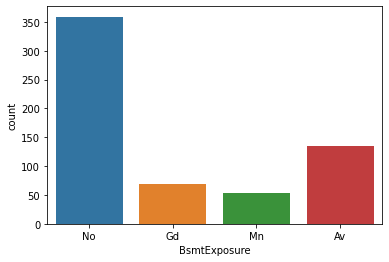

In [30]:
sns.countplot(houses_train[houses_train['BsmtQual'] == 'Gd']['BsmtExposure'])

In [110]:
#based on the chart above , basements with gd quality has no exposure on average , that is the case of the house of index 948
houses_train['BsmtExposure'].iloc[948]  = 'No'

KeyError: 'BsmtExposure'

In [32]:
#the other houses  does not have a basement 
houses_train['BsmtExposure'].fillna(value = 'NA',inplace = True)

In [33]:
houses_train['BsmtExposure'].isna().sum()

0

## BsmtFinType1 column

In [34]:
houses_train['BsmtFinType1'].isna().sum()

37

In [35]:
houses_train[houses_train['BsmtFinType1'].isna()][['BsmtQual']]

,BsmtQual
17,NA
39,NA
90,NA
102,NA
156,NA
182,NA
259,NA
342,NA
362,NA
371,NA


In [36]:
houses_train['BsmtFinType1'].fillna(value = 'NA',inplace = True)

## BsmtFinType2 column

In [37]:
houses_train['BsmtFinType2'].isna().sum()

38

In [38]:
houses_train[houses_train['BsmtFinType2'].isna()][['BsmtQual','TotalBsmtSF']]

,BsmtQual,TotalBsmtSF
17,NA,0
39,NA,0
90,NA,0
102,NA,0
156,NA,0
182,NA,0
259,NA,0
332,Gd,3206
342,NA,0
362,NA,0


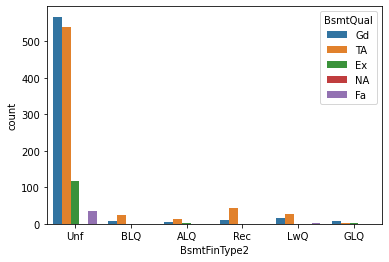

In [39]:
sns.countplot(houses_train['BsmtFinType2'],hue = houses_train['BsmtQual'])
#the vast majority of the second type of finish is unfinished

In [40]:
houses_train['BsmtFinType2'].iloc[332]  = 'Unf'

/home/raphael/.local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [41]:
houses_train['BsmtFinType2'].fillna(value = 'NA',inplace = True)

##  LotFrontage column

In [42]:
houses_train['LotFrontage'].isna().sum()

259

In [43]:
houses_train[houses_train['LotFrontage'].isna()][['LotConfig','LotFrontage']]

,LotConfig,LotFrontage
7,Corner,NaN
12,Inside,NaN
14,Corner,NaN
16,CulDSac,NaN
24,Inside,NaN
...,...,...
1429,Corner,NaN
1431,Inside,NaN
1441,Inside,NaN
1443,Inside,NaN


In [44]:
houses_train['LotFrontage'].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [45]:
houses_train[houses_train['LotFrontage'].isna()]['LotConfig'].value_counts()

Inside     134
Corner      62
CulDSac     49
FR2         14
Name: LotConfig, dtype: int64

In [46]:
lotConfig_means = houses_train.dropna(subset=['LotFrontage']).groupby('LotConfig').LotFrontage.mean()

In [47]:
lotConfig_means

LotConfig
Corner     84.039801
CulDSac    59.911111
FR2        63.515152
FR3        70.750000
Inside     67.715686
Name: LotFrontage, dtype: float64

In [48]:
lotConfig_means['Corner']

84.03980099502488

In [49]:
nullValue_lotFrontage_rows_indexes = houses_train[houses_train['LotFrontage'].isna()].index

In [50]:
lotFrontage_column_index = houses_train.columns.get_loc('LotFrontage')

In [51]:
for i in nullValue_lotFrontage_rows_indexes:
    aux =  float("{:.2f}".format(lotConfig_means[houses_train['LotConfig'].iloc[i]]))
    houses_train.iloc[i,lotFrontage_column_index] = aux
   

In [52]:
houses_train['LotFrontage'].isna().sum()

0

## Electrical column

In [53]:
houses_train['Electrical'].isna().sum()

1

In [54]:
houses_train[houses_train['Electrical'].isna()][['BldgType','OverallQual']]

,BldgType,OverallQual
1379,1Fam,5


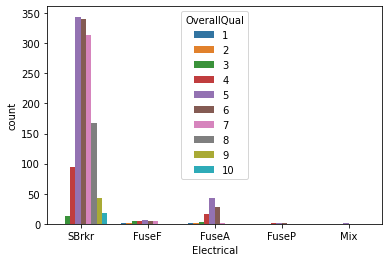

In [55]:
sns.countplot(houses_train['Electrical'],hue = houses_train['OverallQual'])

In [56]:
houses_train['Electrical'].iloc[1379] = 'SBrkr'

/home/raphael/.local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


## FireplaceQu column

In [57]:
houses_train['FireplaceQu'].isna().sum()

690

In [58]:
houses_train['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [59]:
#number of fireplaces in houses that have null value FireplaceQu column
houses_train[houses_train['FireplaceQu'].isna()]['Fireplaces'].value_counts()

0    690
Name: Fireplaces, dtype: int64

In [60]:
#the values are null because the houses doesnt have fireplaces
houses_train['FireplaceQu'].fillna(value = 'NA',inplace = True)

In [61]:
#just for curiosity purpose
houses_train['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

## Garage related  columns 

There is the same number of null values for 5 different atrributes related to the garage of the house , i think that are the same houses in all the cases.
So we'll save the ids of the houses that have that null values(related to the garage) and then compare to see if they are the same.

In [62]:
#saving the id ,in form of list , of every house with null value for each column.
gT = houses_train[houses_train['GarageType'].isna()]['Id'].tolist()
gYB = houses_train[houses_train['GarageYrBlt'].isna()]['Id'].tolist()
gF = houses_train[houses_train['GarageFinish'].isna()]['Id'].tolist()
gQ = houses_train[houses_train['GarageQual'].isna()]['Id'].tolist()
gC = houses_train[houses_train['GarageCond'].isna()]['Id'].tolist()

In [63]:
gT == gYB == gF == gQ == gC
#indeed they are the same houses

True

In [64]:
houses_train[houses_train['GarageType'].isna()]['GarageArea'].value_counts()
#the null values are referent to houses that doesnt have a garage

0    81
Name: GarageArea, dtype: int64

In [65]:
houses_train['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [66]:
#'NA' = no garage
houses_train['GarageType'].fillna(value = 'NA',inplace = True)
houses_train['GarageYrBlt'].fillna(value = 0.0,inplace = True)#we'll probably drop that column later
houses_train['GarageFinish'].fillna(value = 'NA',inplace = True)
houses_train['GarageQual'].fillna(value = 'NA',inplace = True)
houses_train['GarageCond'].fillna(value = 'NA',inplace = True)

## PoolQc column

In [67]:
houses_train[houses_train['PoolQC'].isna()]['PoolArea']

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: PoolArea, Length: 1453, dtype: int64

In [68]:
houses_train['PoolQC'].fillna(value = 'NA',inplace = True)

Having a pool probably is not a relevant attribute to determine the price of a house since only 7 houses actually have a pool.

## Fence column

In [69]:
houses_train['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In my opinion the missing data is for houses that has no fence , because is the only categorie that isnt in the dataset and we saw similar cases in other features.

In [70]:
houses_train['Fence'].fillna(value = 'NA',inplace = True)

## MiscFeature column

In [71]:
houses_train[houses_train['MiscFeature'].isna()]['MiscVal']

0       0
1       0
2       0
3       0
4       0
       ..
1454    0
1455    0
1456    0
1458    0
1459    0
Name: MiscVal, Length: 1406, dtype: int64

In [72]:
houses_train['MiscFeature'].fillna(value = 'NA',inplace = True)

In [73]:
houses_train['MiscFeature'].value_counts()

NA      1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

Miscellaneous features probably arent relevant to the prediction.

In [74]:
##next steps
#eda
#feature engineer
#selecting the model

# EDA

In [75]:
#import pandas_profiling as pp
#profile = pp.ProfileReport(houses_train, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})
#saving the profile
#profile.to_file(output_file="Relatorio01.html")

In [76]:
#profile.to_file(output_file="eda.html")

In [77]:
houses_train = pd.get_dummies(houses_train,drop_first=True)

In [78]:
houses_train_corr = houses_train.corr()

In [79]:
houses_train_corr['SalePrice']

Id                      -0.021917
MSSubClass              -0.084284
LotFrontage              0.330222
LotArea                  0.263843
OverallQual              0.790982
                           ...   
SaleCondition_AdjLand   -0.050686
SaleCondition_Alloca    -0.015525
SaleCondition_Family    -0.046480
SaleCondition_Normal    -0.153990
SaleCondition_Partial    0.352060
Name: SalePrice, Length: 259, dtype: float64

In [80]:
salePrice_corr = houses_train_corr['SalePrice']

In [81]:
relevant_salePrice_corr = []

In [82]:
#here well searching for relevation correlations , ill consider a correlation relevant if its >= 0.5 and <= -0.5
for (columnName, columnData) in salePrice_corr.iteritems():
    if columnData >= 0.5 or columnData <= -0.5:
        relevant_salePrice_corr.append((columnName,columnData))

In [83]:
relevant_salePrice_corr

[('OverallQual', 0.7909816005838047),
 ('YearBuilt', 0.5228973328794967),
 ('YearRemodAdd', 0.5071009671113867),
 ('TotalBsmtSF', 0.6135805515591944),
 ('1stFlrSF', 0.6058521846919166),
 ('GrLivArea', 0.7086244776126511),
 ('FullBath', 0.5606637627484452),
 ('TotRmsAbvGrd', 0.5337231555820238),
 ('GarageCars', 0.640409197258349),
 ('GarageArea', 0.6234314389183598),
 ('SalePrice', 1.0),
 ('ExterQual_TA', -0.589043523409763),
 ('KitchenQual_TA', -0.5192978536548846)]

In [84]:
#We'll not use the GarageArea column because it may be too much correlated to GarageCars
houses_train_corr['GarageArea']['GarageCars']

0.8824754142814603

In [85]:
relevant_columns_names_train = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars',
 'ExterQual_TA', 'KitchenQual_TA','SalePrice']

In [86]:
houses_train  = houses_train[relevant_columns_names_train]

In [87]:
#now we have our dataset ready to be splitted and used on the models
houses_train

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,ExterQual_TA,KitchenQual_TA,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,0,0,208500
1,6,1976,1976,1262,1262,1262,2,6,2,1,1,181500
2,7,2001,2002,920,920,1786,2,6,2,0,0,223500
3,7,1915,1970,756,961,1717,1,7,3,1,0,140000
4,8,2000,2000,1145,1145,2198,2,9,3,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,1,1,175000
1456,6,1978,1988,1542,2073,2073,2,7,2,1,1,210000
1457,7,1941,2006,1152,1188,2340,2,9,1,0,0,266500
1458,5,1950,1996,1078,1078,1078,1,5,1,1,0,142125


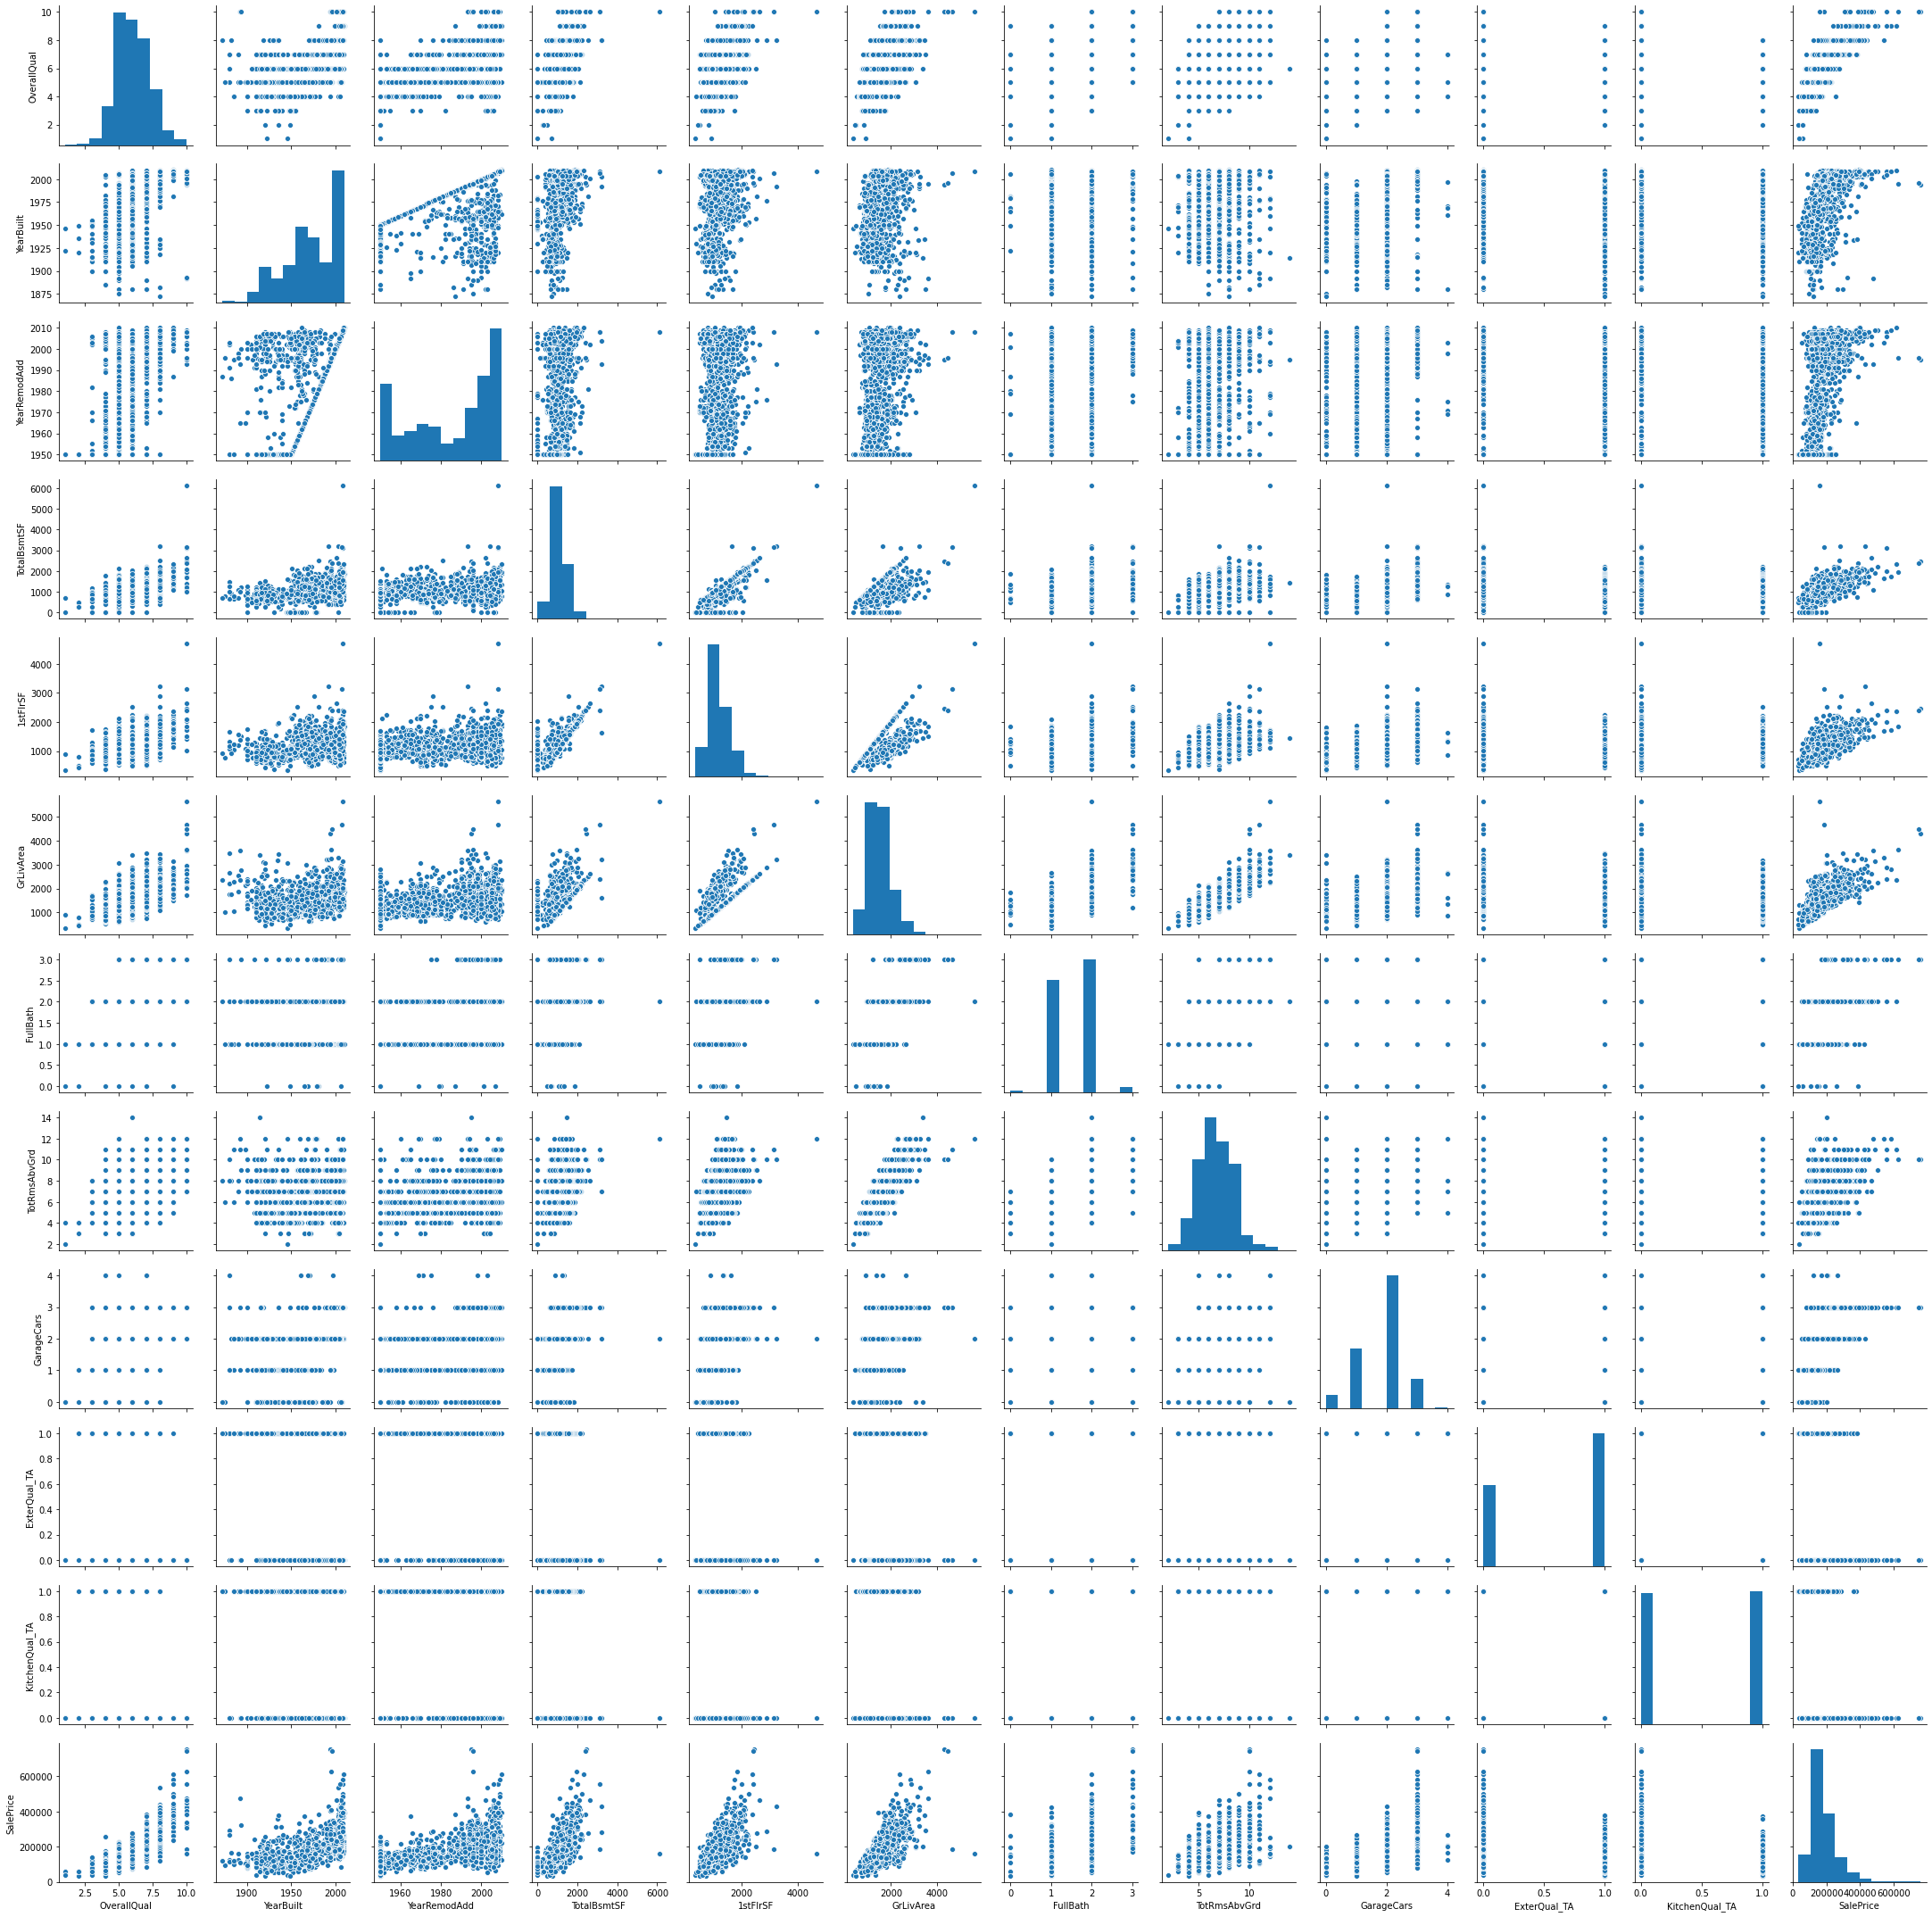

In [88]:
sns.pairplot(houses_train)

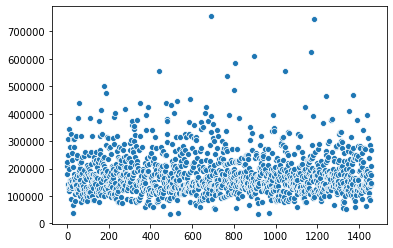

In [111]:
#searching for outliers
sns.scatterplot(data =houses_train['SalePrice'])

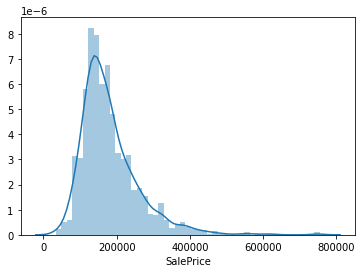

In [113]:
sns.distplot( houses_train['SalePrice'])

In [90]:
houses_train[houses_train['SalePrice'] > 700000]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,ExterQual_TA,KitchenQual_TA,SalePrice
691,10,1994,1995,2444,2444,4316,3,10,3,0,0,755000
1182,10,1996,1996,2396,2411,4476,3,10,3,0,0,745000


In [91]:
houses_train['TotalBsmtSF'].describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [92]:
houses_train['1stFlrSF'].describe()

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

It looks like that the price of the 2 houses above 700k usd is justificable , they are really above average quality houses.

# Test dataset for Kaggle competition

In [93]:
test_ids = houses_test['Id']

In [94]:
relevant_columns_names_test = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars']
houses_test = pd.get_dummies(houses_test,drop_first=True)
houses_test = houses_test[relevant_columns_names_test]

In [95]:
save = 'ExterQual_TA', 'KitchenQual_TA'

In [96]:
columns_with_null_values = houses_test.columns[houses_test.isna().any()].tolist()

#getting the name and total number of null values per column
columns_with_null_values_sum = {}
for column_name in columns_with_null_values:
    columns_with_null_values_sum[column_name] = houses_test[column_name].isnull().sum()
    
columns_with_null_values_sum

{'TotalBsmtSF': 1, 'GarageCars': 1}

In [97]:
houses_test[houses_test['GarageCars'].isna()]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars
1116,5,1923,1999,859.0,942,1828,2,6,NaN


In [98]:
houses_test['GarageCars'].fillna(value = houses_test['GarageCars'].mean(),inplace = True)

In [99]:
houses_test[houses_test['TotalBsmtSF'].isna()]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars
660,4,1946,1950,NaN,896,896,1,4,1.0


In [100]:
houses_test['TotalBsmtSF'].fillna(value = houses_test['TotalBsmtSF'].mean(),inplace = True)

## Splitting the training and test sets

In [101]:
y = houses_train['SalePrice']

In [102]:
X = houses_train.drop(['SalePrice','ExterQual_TA', 'KitchenQual_TA'],axis = 1)

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training models

## Linear Regression model

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
lm = LinearRegression()

In [107]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [108]:
lm_predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

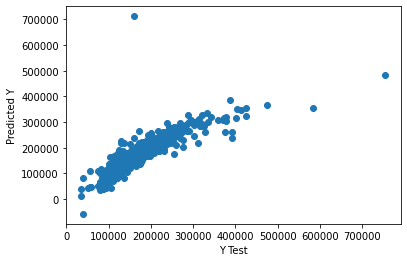

In [109]:
plt.scatter(y_test,lm_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [121]:
from sklearn import metrics

In [122]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_predictions)))
print('R2 score:', lm.score(X_test,y_test))

RMSE: 43916.7616348166
R2 score: 0.6935113265443953


## Random Forest Regressor model

In [114]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
rfr = RandomForestRegressor()

In [116]:
rfr.fit(X_train,y_train)

/home/raphael/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [117]:
rfr_predictions = rfr.predict( X_test)

Text(0, 0.5, 'Predicted Y')

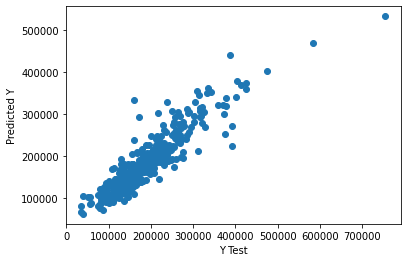

In [118]:
plt.scatter(y_test,rfr_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [123]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_predictions)))
print('R2 score:', rfr.score(X_test,y_test))

RMSE: 32456.30295821124
R2 score: 0.8326013659246785


## Kaggle linear regression entry
This model got a 0.73142 score on the competition

In [128]:
kaggle_lm_predictions = lm.predict(houses_test)

In [129]:
kaggle_lm_predictions = pd.Series(kaggle_lm_predictions)

In [136]:
kaggle_lm_entry = pd.concat([test_ids,kaggle_lm_predictions],axis=1)
kaggle_lm_entry.columns = ['Id','SalePrice']

In [138]:
kaggle_lm_entry.to_csv('lm_entry.cvs',index=False)

## Kaggle Random Forest regressor entry
This model got a 0.17097 score on the competition 

In [132]:
kaggle_rfr_predictions = rfr.predict(houses_test)

In [133]:
kaggle_rfr_predictions = pd.Series(kaggle_rfr_predictions)

In [139]:
kaggle_rfr_entry = pd.concat([test_ids,kaggle_rfr_predictions],axis=1)
kaggle_rfr_entry.columns = ['Id','SalePrice']

In [140]:
kaggle_rfr_entry.to_csv('rfr_entry.cvs',index=False)